In [350]:
import pandas as pd
import numpy as np
import re

from datetime import datetime, date, timedelta

import matplotlib.pyplot as plt


## MAIN

In [351]:
MAIN = pd.read_csv("MAIN.csv")
for c in MAIN.columns[1:]:
    if MAIN[c].iloc[-1] == MAIN[c].iloc[-2]:
        MAIN[c].iloc[-1] = np.nan
    if MAIN[c].iloc[-2] == MAIN[c].iloc[-3]:
        MAIN[c].iloc[-2] = np.nan
    MAIN[c[12:]] = [MAIN[c].iloc[0]] + list(np.diff(MAIN[c]))
MAIN.rename(columns={'datum': 'date'}, inplace=True)
MAIN

C:\Users\herrm\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,date,kumulativni_pocet_nakazenych,kumulativni_pocet_vylecenych,kumulativni_pocet_umrti,kumulativni_pocet_testu,pocet_nakazenych,pocet_vylecenych,pocet_umrti,pocet_testu
0,2020-01-27,0,0,0,20.0,0,0,0,20.0
1,2020-01-28,0,0,0,28.0,0,0,0,8.0
2,2020-01-29,0,0,0,33.0,0,0,0,5.0
3,2020-01-30,0,0,0,34.0,0,0,0,1.0
4,2020-01-31,0,0,0,37.0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...
270,2020-10-23,238325,110219,2063,2022805.0,15254,6572,112,45223.0
271,2020-10-24,250796,110641,2185,2061995.0,12471,422,122,39190.0
272,2020-10-25,258097,110924,2310,2083370.0,7301,283,125,21375.0
273,2020-10-26,268370,111301,2449,2118316.0,10273,377,139,34946.0


## FB

In [352]:
#FB = pd.read_csv("FB.txt", sep = "\t")
#FB = FB[FB.country=='CZE']
#FB.to_csv("FB_CZE.csv")
FB = pd.read_csv("FB_CZE.csv")
region_coding = {
    'CZE.1_1': 'Ceske Budejovice',
    'CZE.2_1': 'Brno',
    'CZE.3_1': 'Karlovy Vary',
    'CZE.4_1': 'Jihlava',
    'CZE.5_1': 'Hradec Kralove',
    'CZE.6_1': 'Liberec',
    'CZE.7_1': 'Ostrava',
    'CZE.8_1': 'Olomouc',
    'CZE.9_1': 'Pardubice',
    'CZE.10_1': 'Plzen',
    'CZE.11_1': 'Praha',
    'CZE.12_1': 'Stredocesky',
    'CZE.13_1': 'Usti',
    'CZE.14_1': 'Zlin'
}
FB['region_name'] = FB['polygon_id'].apply(lambda x: region_coding[x])
FB = FB.merge(pd.read_csv('region_inhabitans.csv'), how='left', on="region_name")
FB['all_day_bing_tiles_visited_count_change'] = FB['all_day_bing_tiles_visited_relative_change'] * FB['inhabitans']
FB['all_day_single_tile_users'] = FB['all_day_ratio_single_tile_users'] * FB['inhabitans']
FB

,Unnamed: 0,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type,region_name,inhabitans,all_day_bing_tiles_visited_count_change,all_day_single_tile_users
0,1216539,2020-03-01,CZE,GADM,CZE.10_1,NaN,0.03969,0.27700,full_february,DAY_OF_WEEK,Plzen,590461,23435.39709,163557.69700
1,1216540,2020-03-02,CZE,GADM,CZE.10_1,NaN,0.04003,0.14216,full_february,DAY_OF_WEEK,Plzen,590461,23636.15383,83939.93576
2,1216541,2020-03-03,CZE,GADM,CZE.10_1,NaN,-0.03595,0.17218,full_february,DAY_OF_WEEK,Plzen,590461,-21227.07295,101665.57498
3,1216542,2020-03-04,CZE,GADM,CZE.10_1,NaN,-0.01282,0.15398,full_february,DAY_OF_WEEK,Plzen,590461,-7569.71002,90919.18478
4,1216543,2020-03-05,CZE,GADM,CZE.10_1,NaN,-0.00481,0.15201,full_february,DAY_OF_WEEK,Plzen,590461,-2840.11741,89755.97661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,1219866,2020-10-20,CZE,GADM,CZE.9_1,Pardubický,-0.07176,0.19815,full_february,DAY_OF_WEEK,Pardubice,523054,-37534.35504,103643.15010
3328,1219867,2020-10-21,CZE,GADM,CZE.9_1,Pardubický,-0.04729,0.19177,full_february,DAY_OF_WEEK,Pardubice,523054,-24735.22366,100306.06558
3329,1219868,2020-10-22,CZE,GADM,CZE.9_1,Pardubický,-0.10316,0.20024,full_february,DAY_OF_WEEK,Pardubice,523054,-53958.25064,104736.33296
3330,1219869,2020-10-23,CZE,GADM,CZE.9_1,Pardubický,-0.15269,0.21023,full_february,DAY_OF_WEEK,Pardubice,523054,-79865.11526,109961.64242


In [353]:
FB.region_name.value_counts(dropna=False)

Olomouc             238
Usti                238
Karlovy Vary        238
Hradec Kralove      238
Stredocesky         238
Plzen               238
Zlin                238
Praha               238
Ceske Budejovice    238
Ostrava             238
Jihlava             238
Pardubice           238
Brno                238
Liberec             238
Name: region_name, dtype: int64

## GOOGLE

In [354]:
GO = pd.read_csv("GO.csv")
GO

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-15,13.0,8.0,37.0,14.0,3.0,-2
1,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-16,12.0,8.0,28.0,9.0,2.0,-1
2,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-17,4.0,2.0,17.0,1.0,-2.0,0
3,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-18,9.0,5.0,22.0,2.0,-2.0,0
4,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-19,4.0,1.0,6.0,-2.0,-2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-16,-42.0,1.0,-15.0,-35.0,-24.0,16
3731,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-17,-52.0,1.0,-9.0,-32.0,-11.0,10
3732,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-18,-44.0,-6.0,25.0,-26.0,-13.0,6
3733,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-19,-31.0,-1.0,36.0,-27.0,-24.0,12


In [355]:
GO.sub_region_1.value_counts(dropna=False)

South Bohemian Region       249
Zlín Region                 249
Ústí nad Labem Region       249
Vysočina Region             249
Plzeň Region                249
Pardubice Region            249
South Moravian Region       249
Hradec Králové Region       249
Central Bohemian Region     249
Karlovy Vary Region         249
Olomouc Region              249
Moravian-Silesian Region    249
Prague                      249
Liberec Region              249
NaN                         249
Name: sub_region_1, dtype: int64

## Face masks

In [356]:
MU = pd.read_csv("MU.csv", sep = ";")
MU

,date,face_masks_level,face_masks,desc
0,2020-01-01,0,nothing,NaN
1,2020-03-17,3,traffic_somewhere,roušky v MHD v Praze
2,2020-03-18,10,everywhere,pobyt na všech místech mimo bydliště pouze s r...
3,2020-05-05,9,almost_everywhere,"přidané výjimky, nové opatření"
4,2020-05-26,8,inside_traffic_outside_somewhere,"roušky ve vnitřních prostorách, v MHD, venku t..."
5,2020-06-15,7,inside_traffic_mass,"roušky ve vnitřních prostorách, v MHD, na venk..."
6,2020-07-01,2,traffic_somewhere,"zrušení celoplošných opatření, zůstávají v Pra..."
7,2020-09-10,5,inside_traffic,"roušky ve všech vnitřních prostorech, v MHD"
8,2020-09-24,6,inside_traffic_schools,"roušky ve školách Praha, roušky na hromadných ..."
9,2020-10-13,6,inside_traffic_schools,"roušky ve vnitřních prostorách, v MHD včetně n..."


## T-Mobile

In [357]:
TMobile = pd.read_csv("TMobile.csv")
TMobile['date'] = TMobile['Datum'].apply(lambda x: datetime.strptime(x, '%d. %m. %Y'))
TMobile = TMobile.drop('Datum', axis=1)
TMobile.rename(
    columns={
        'Změna nevyjíždějících klouzavý průměr 30': 'tmobile_homestayers_change_smooth',
        'Změna Google obytné budovy klouzavý průměr 30': 'google_homestayers_change_smooth'
    }, inplace=True)
TMobile

,tmobile_homestayers_change_smooth,google_homestayers_change_smooth,date
0,0.18,NaN,2020-01-01
1,0.18,NaN,2020-01-02
2,0.18,NaN,2020-01-03
3,0.19,NaN,2020-01-04
4,0.19,NaN,2020-01-05
...,...,...,...
295,-0.06,0.07,2020-10-22
296,-0.05,0.07,2020-10-23
297,-0.06,0.08,2020-10-24
298,-0.06,0.08,2020-10-25


## PN

In [358]:
PN = pd.read_csv("PN.csv")
PN['day_in_year'] = 7*PN2020['week']-4
PN2019 = PN.copy()
PN2020 = PN.copy()
PN2021 = PN.copy()
PN2019['year'] = 2019
PN2020['year'] = 2020
PN2021['year'] = 2021
PN = pd.concat(
    [
        PN2019,
        PN2020,
        PN2021
    ]
)
PN['date'] = PN[['year', 'day_in_year']].apply(lambda x: date(x[0], 1, 1) + timedelta(days=int(x[1])), axis=1)
PN = PN.sort_values('date').reset_index(drop=True)

PNscel = pd.DataFrame([date(2019, 1, 4) + timedelta(days=d) for d in range(365*3-2)], columns = ['date'])
PNscel['pneumonia_all'] = np.nan

for d in PNscel['date']:
    p = PN[PN['date']<=d].iloc[-1]
    pdate = p['date']
    ppn = p['pneumonia_all']
    if d < max(PN['date']):
        n = PN[PN['date']>d].iloc[0]
        ndate = n['date']
        npn = n['pneumonia_all']
        ddiff1 = int((d - pdate).days)
        ddiff2 = int((ndate - pdate).days)
        pndiff = npn - ppn
        PNscel.iloc[
            PNscel[PNscel['date'] == d].index.values[0], 
            PNscel.columns.get_loc('pneumonia_all')
        ] = ppn + (ddiff1 / ddiff2) * pndiff 
    elif d == max(PN['date']):     
        PNscel.iloc[
            PNscel[PNscel['date'] == d].index.values[0], 
            PNscel.columns.get_loc('pneumonia_all')
        ] = ppn

PN = PNscel.dropna()
PN.index = pd.to_datetime(PN['date'], infer_datetime_format=True)
PN = PN.drop('date', axis=1)
PN

,pneumonia_all
date,
2019-01-04,1429.054054
2019-01-05,1444.379501
2019-01-06,1459.704947
2019-01-07,1475.030394
2019-01-08,1490.355840
...,...
2021-12-23,1281.963772
2021-12-24,1293.155998
2021-12-25,1304.348223


# DATA PREPARATION

### aggregating FB

In [359]:
FBg = FB.groupby('ds').agg({"all_day_bing_tiles_visited_count_change": sum, "all_day_single_tile_users": sum, "inhabitans": sum})
FBg["all_day_bing_tiles_visited_relative_change"] = FBg["all_day_bing_tiles_visited_count_change"]/FBg["inhabitans"]
FBg["all_day_ratio_single_tile_users"] = FBg["all_day_single_tile_users"]/FBg["inhabitans"]

### aggregating Google

In [360]:
GOg = GO.set_index('date', inplace=False)
GOg = GOg[GOg.sub_region_1.isna()][[
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline'    
]]

### aggregating MU

In [361]:
MUg = MU.copy()
MUg.index = pd.to_datetime(MUg['date'], infer_datetime_format=True)
MUg = MUg.drop('date', axis=1)

### aggregating T-Mobile

In [362]:
TMobileg = TMobile.copy()
TMobileg.index = pd.to_datetime(TMobileg['date'], infer_datetime_format=True)
TMobileg = TMobileg.drop('date', axis=1)

## merging

In [363]:
data = MAIN.copy()
data.index = pd.to_datetime(data['date'], infer_datetime_format=True)
data = data.drop('date', axis=1)
data = data.join(FBg, how='left')
data = data.join(GOg, how='left')
data = data.join(TMobileg, how='left')
data = data.join(PN, how='left')
data = pd.merge_asof(data, MUg, left_index=True, right_index=True)

In [364]:
data.columns

Index(['kumulativni_pocet_nakazenych', 'kumulativni_pocet_vylecenych',
       'kumulativni_pocet_umrti', 'kumulativni_pocet_testu',
       'pocet_nakazenych', 'pocet_vylecenych', 'pocet_umrti', 'pocet_testu',
       'all_day_bing_tiles_visited_count_change', 'all_day_single_tile_users',
       'inhabitans', 'all_day_bing_tiles_visited_relative_change',
       'all_day_ratio_single_tile_users',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'tmobile_homestayers_change_smooth', 'google_homestayers_change_smooth',
       'pneumonia_all', 'face_masks_level', 'face_masks', 'desc'],
      dtype='object')

## feature selection

In [365]:
preds = [
    'kumulativni_pocet_nakazenych', 'kumulativni_pocet_vylecenych',
    'kumulativni_pocet_umrti', 'kumulativni_pocet_testu',
    'pocet_nakazenych', 'pocet_vylecenych', 'pocet_umrti', 'pocet_testu',
    'all_day_bing_tiles_visited_relative_change',
    'all_day_ratio_single_tile_users',
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline', 'face_masks_level',
    'tmobile_homestayers_change_smooth', 'google_homestayers_change_smooth',
    'pneumonia_all'
]

In [366]:
data_final = data[preds]
data_final

,kumulativni_pocet_nakazenych,kumulativni_pocet_vylecenych,kumulativni_pocet_umrti,kumulativni_pocet_testu,pocet_nakazenych,pocet_vylecenych,pocet_umrti,pocet_testu,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,face_masks_level,tmobile_homestayers_change_smooth,google_homestayers_change_smooth,pneumonia_all
date,,,,,,,,,,,,,,,,,,,,
2020-01-27,0,0,0,20.0,0,0,0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.02,NaN,1712.987013
2020-01-28,0,0,0,28.0,0,0,0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.02,NaN,1720.389610
2020-01-29,0,0,0,33.0,0,0,0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.01,NaN,1727.792208
2020-01-30,0,0,0,34.0,0,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.01,NaN,1735.194805
2020-01-31,0,0,0,37.0,0,0,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.02,-0.02,1742.597403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-23,238325,110219,2063,2022805.0,15254,6572,112,45223.0,-0.162042,0.221533,NaN,NaN,NaN,NaN,NaN,NaN,8,-0.05,0.07,850.255083
2020-10-24,250796,110641,2185,2061995.0,12471,422,122,39190.0,-0.185245,0.305973,NaN,NaN,NaN,NaN,NaN,NaN,8,-0.06,0.08,858.942457
2020-10-25,258097,110924,2310,2083370.0,7301,283,125,21375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,-0.06,0.08,867.602852


## raw exploration

In [369]:
def make_exploration(data_final):
    preds = data_final.columns
    E = pd.DataFrame([], index = preds)
    E['first_date'] = date(1970, 1, 1)
    E['last_date'] = date(1970, 1, 1)
    E['min'] = np.nan
    E['max'] = np.nan
    E['nas_between'] = -1

    for p in preds:
        df_nn = data_final[~data_final[p].isna()][p]
        fi = df_nn.index.values[0]
        li = df_nn.index.values[-1]
        s = data_final.loc[fi:li][p]

        i = list(E.index).index(p)

        E.iloc[i, E.columns.get_loc('first_date')] = pd.Timestamp(fi).date()
        E.iloc[i, E.columns.get_loc('last_date')] = pd.Timestamp(li).date()
        E.iloc[i, E.columns.get_loc('nas_between')] = s.isna().sum()
        E.iloc[i, E.columns.get_loc('min')] = s.min()
        E.iloc[i, E.columns.get_loc('max')] = s.max()

    return(E)

In [370]:
make_exploration(data_final)

,first_date,last_date,min,max,nas_between
kumulativni_pocet_nakazenych,2020-01-27,2020-10-27,0.000000,2.840330e+05,0
kumulativni_pocet_vylecenych,2020-01-27,2020-10-27,0.000000,1.114430e+05,0
kumulativni_pocet_umrti,2020-01-27,2020-10-27,0.000000,2.547000e+03,0
kumulativni_pocet_testu,2020-01-27,2020-10-26,20.000000,2.118316e+06,0
pocet_nakazenych,2020-01-27,2020-10-27,0.000000,1.566300e+04,0
pocet_vylecenych,2020-01-27,2020-10-27,0.000000,6.572000e+03,0
pocet_umrti,2020-01-27,2020-10-27,0.000000,1.390000e+02,0
pocet_testu,2020-01-27,2020-10-26,0.000000,4.639000e+04,0
all_day_bing_tiles_visited_relative_change,2020-03-01,2020-10-24,-0.518864,3.232747e-01,0
all_day_ratio_single_tile_users,2020-03-01,2020-10-24,0.122166,4.774885e-01,0


## data manipulation

### smoothing

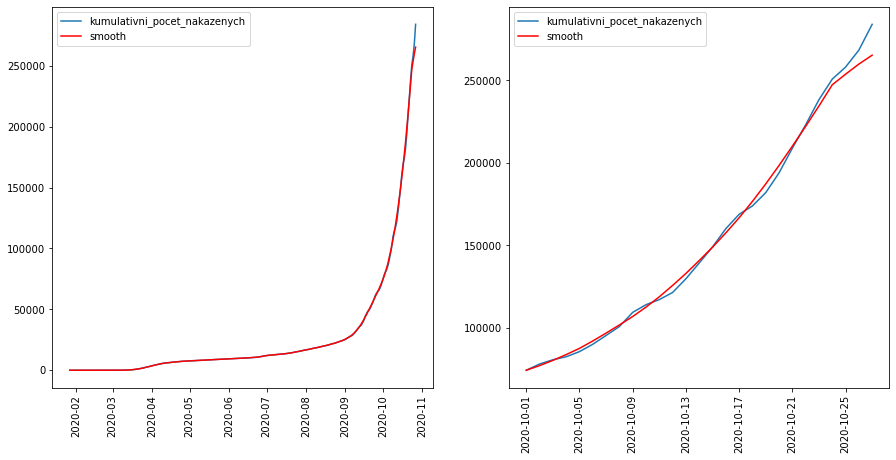

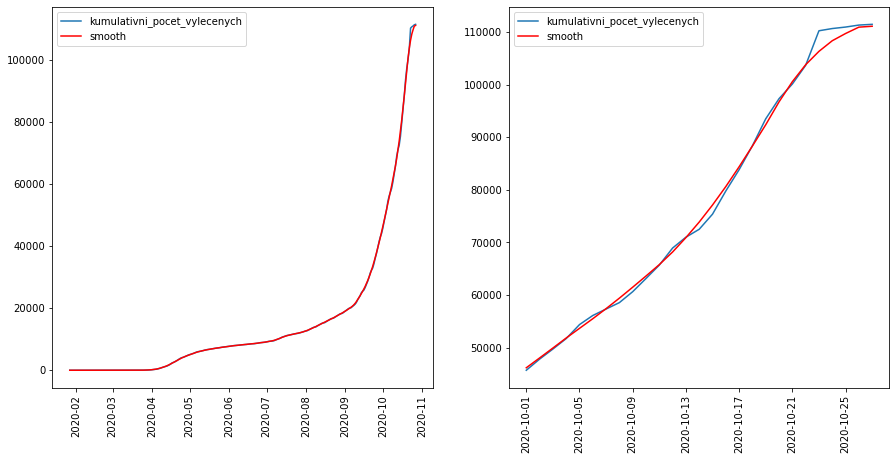

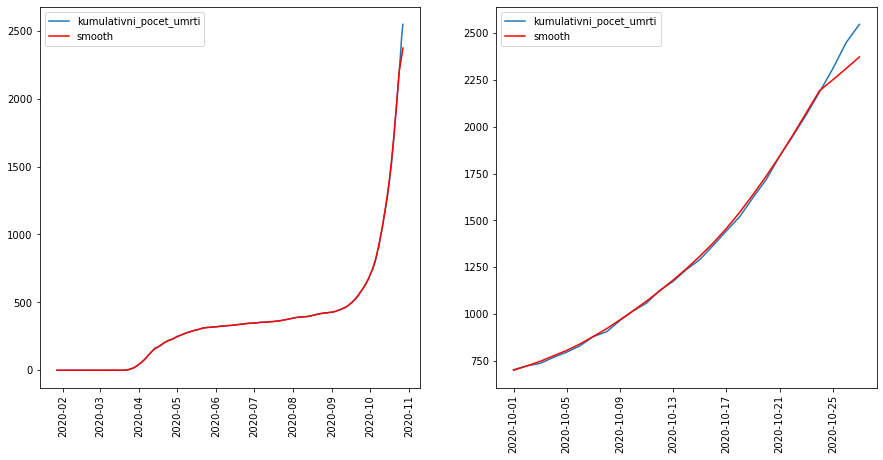

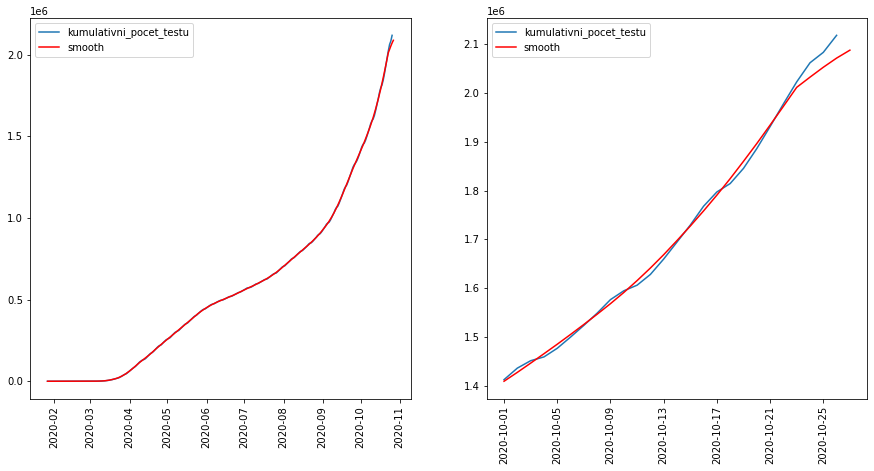

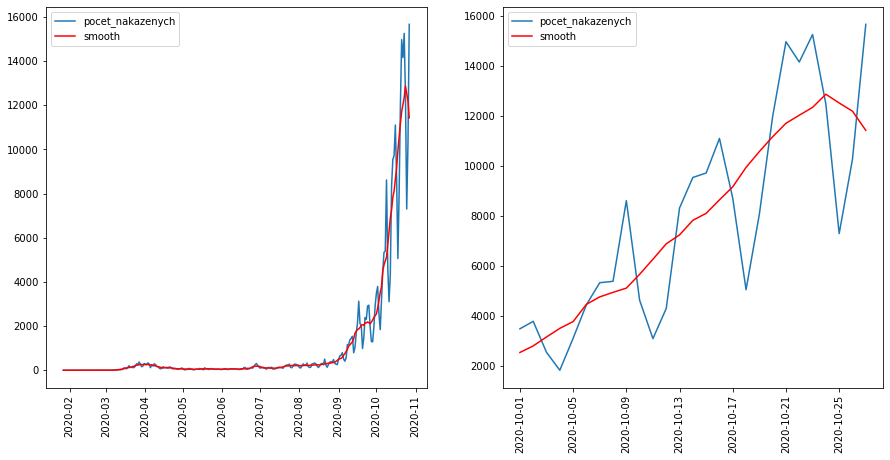

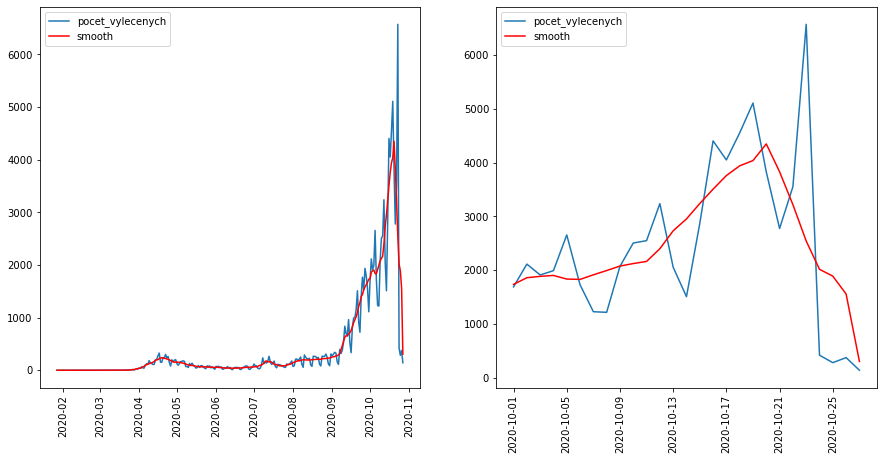

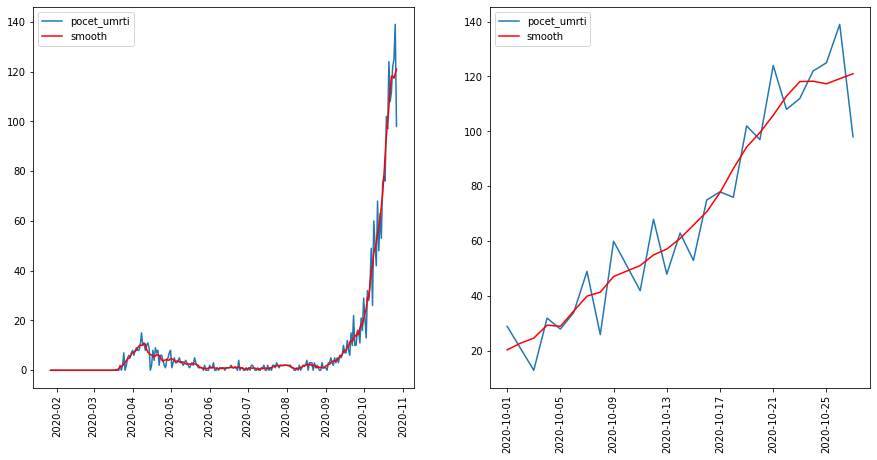

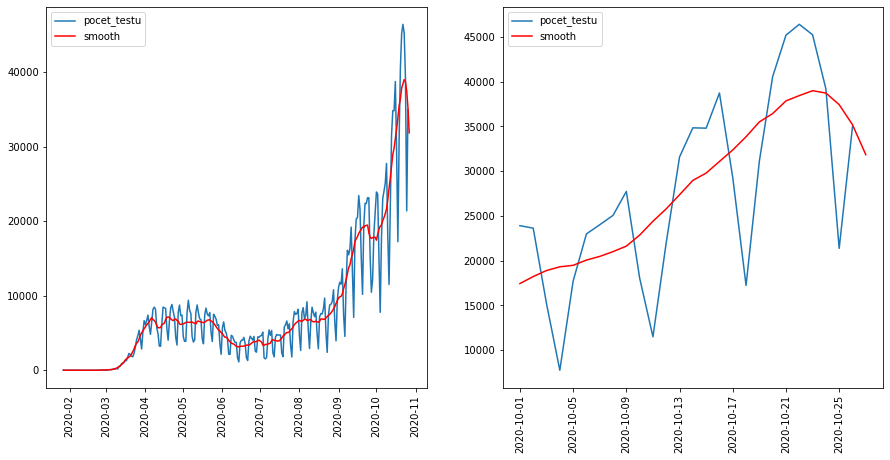

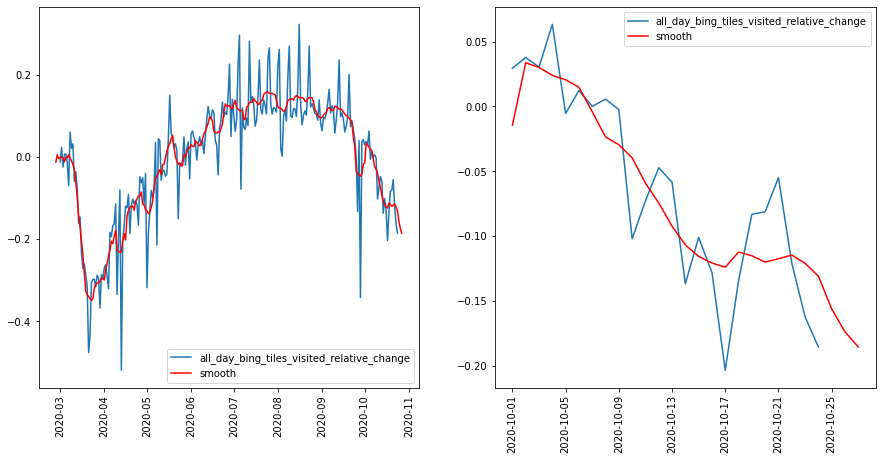

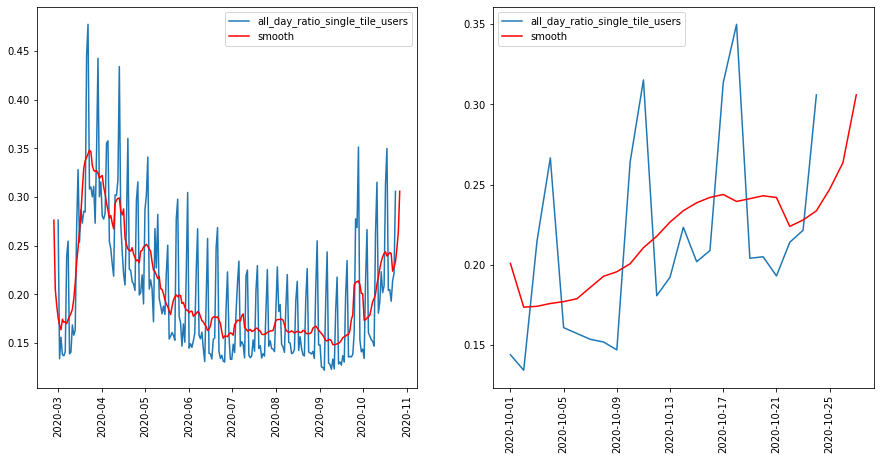

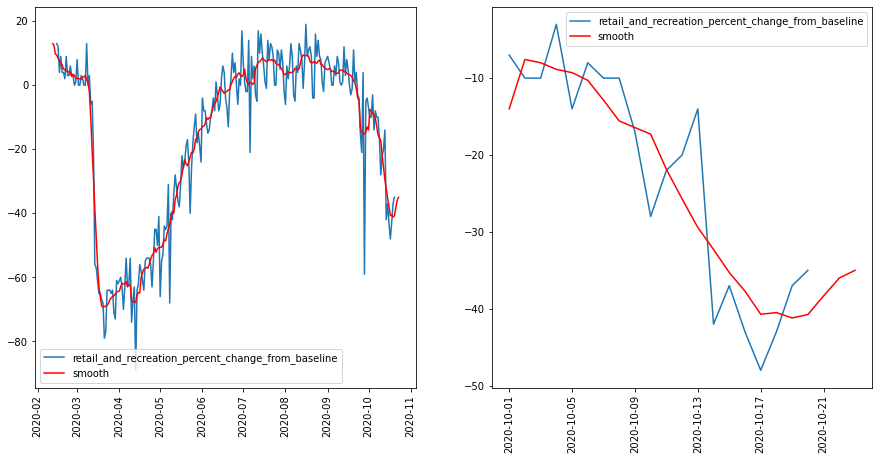

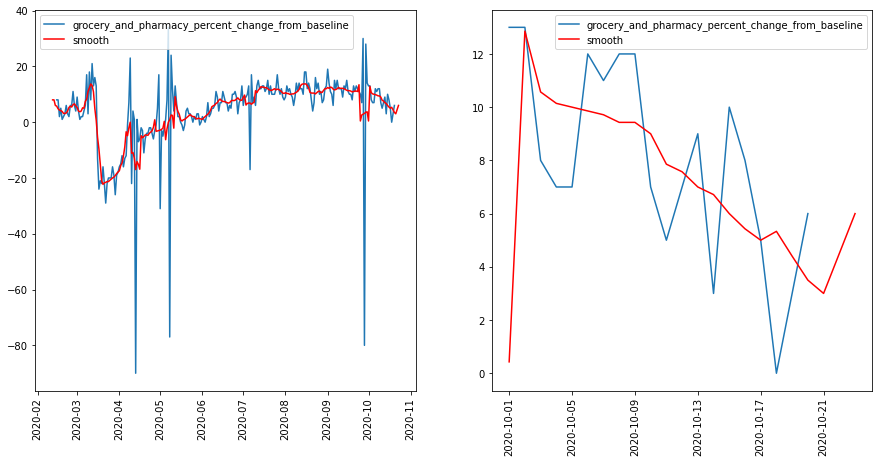

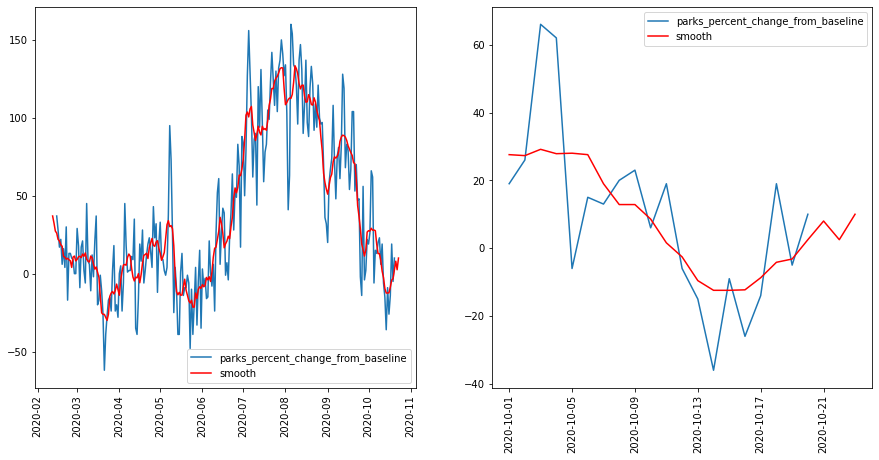

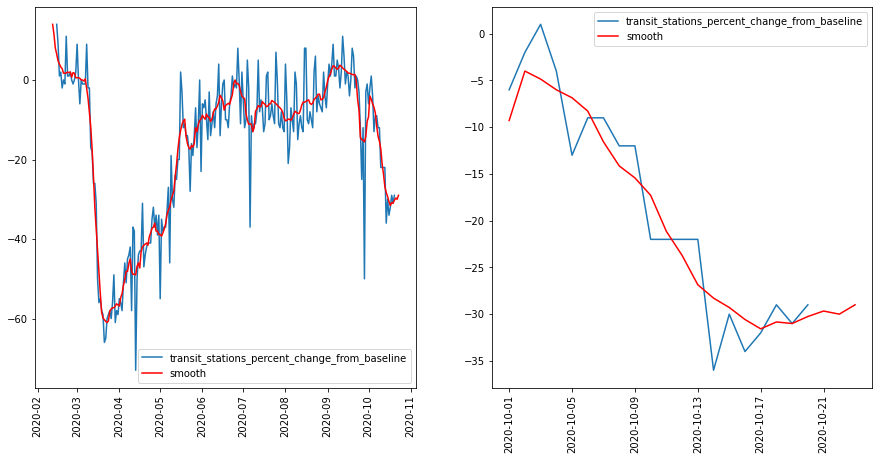

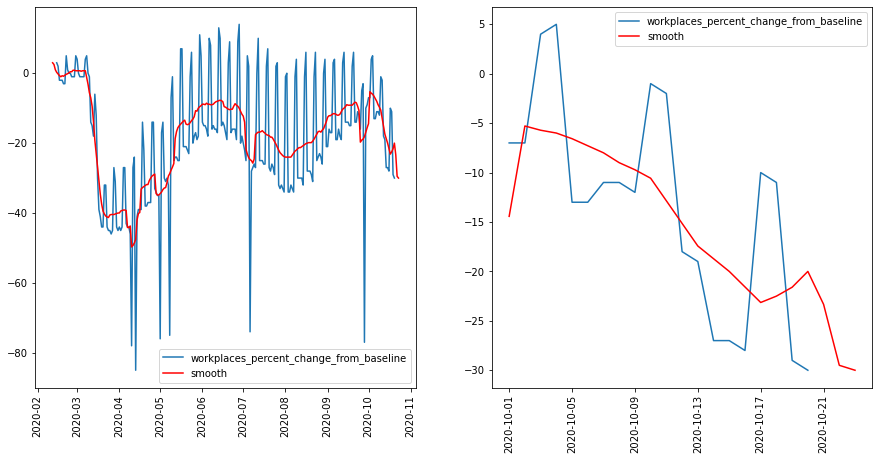

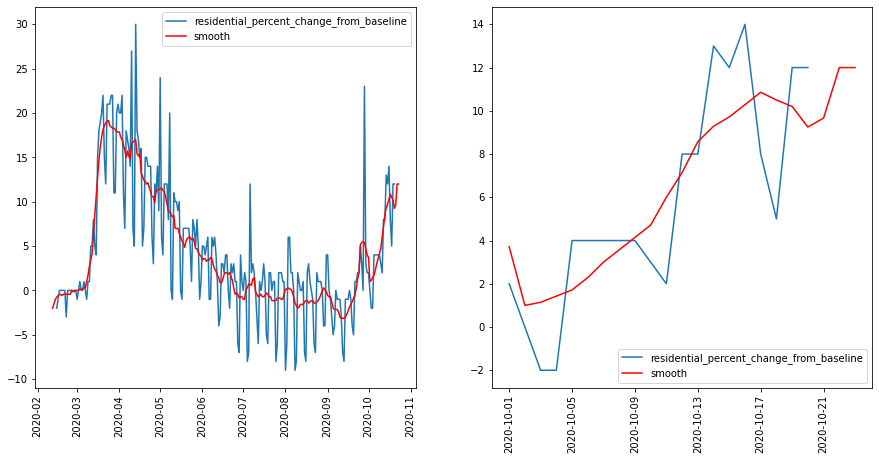

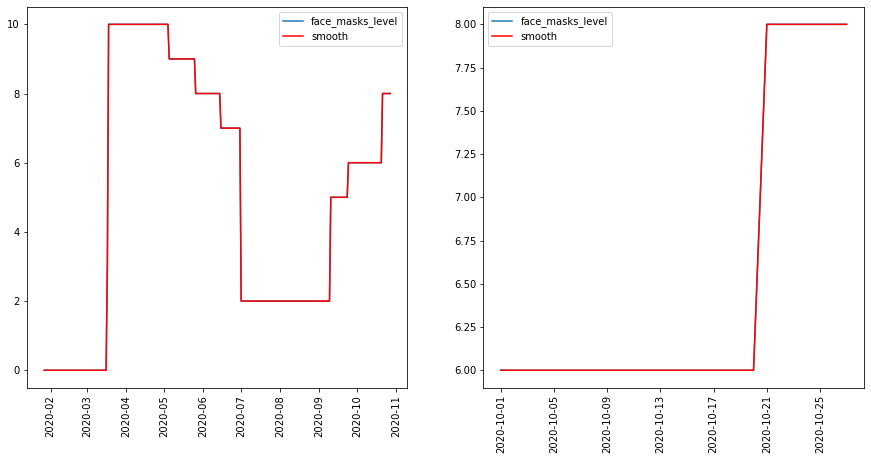

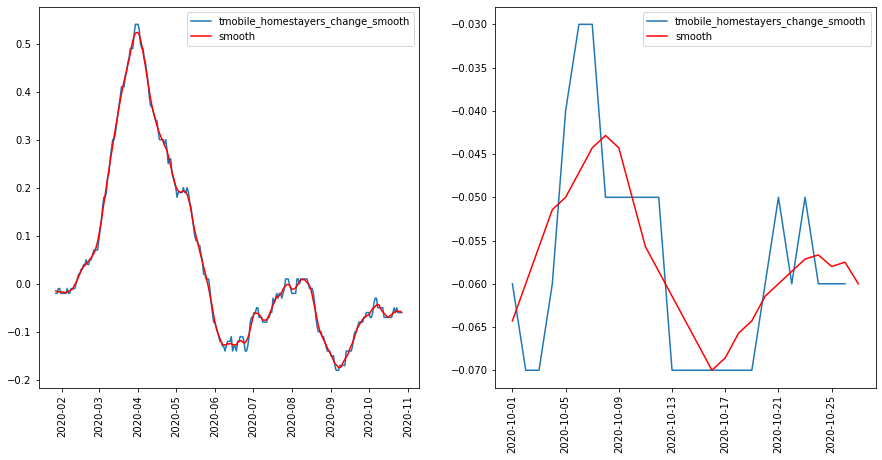

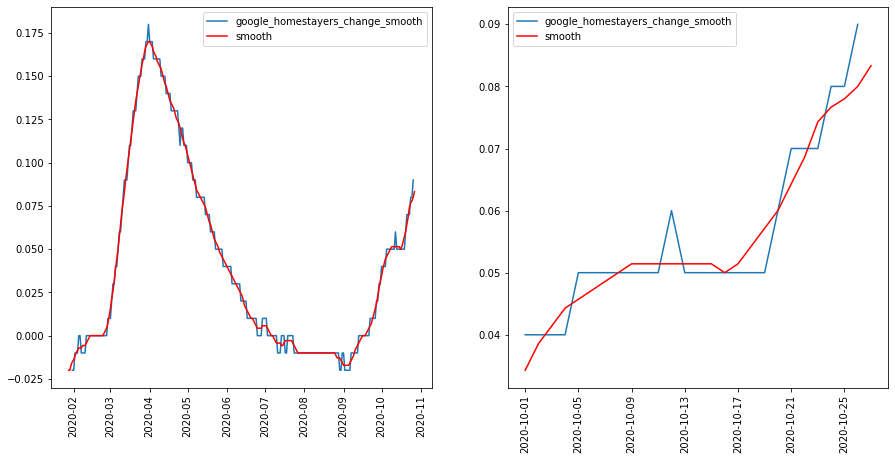

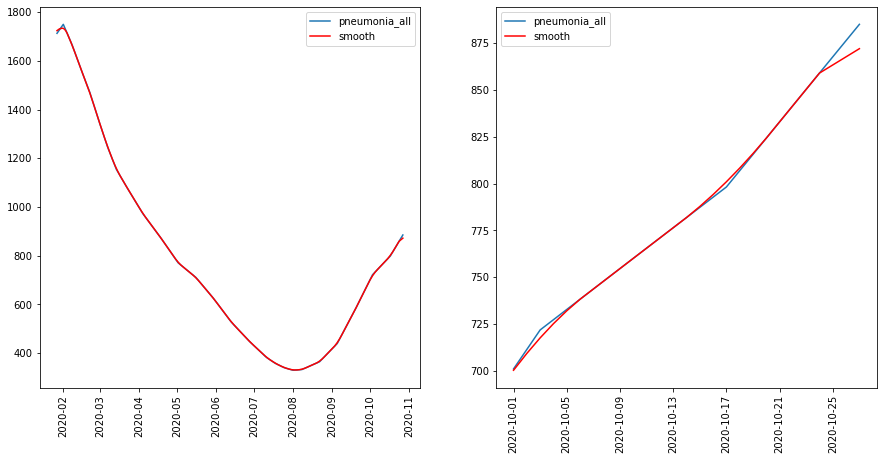

In [404]:
smooth_ignore = [
    'face_masks_level'
]

data_final_sm = data_final.copy()
for p in preds:
    data_final_sm[f"{p}_orig"] = data_final_sm[f"{p}"]
    if p not in smooth_ignore:
        data_final_sm[f"{p}"] = data_final_sm[f"{p}"].rolling(7, center=True, min_periods=1).mean()

    plt.figure(figsize=(15,7))
    plt.subplot(1, 2, 1)
    plt.plot(data_final_sm[f"{p}_orig"], label=p)
    plt.plot(data_final_sm[f"{p}"], label="smooth", color = "red")
    plt.xticks(rotation=90)
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(data_final_sm[data_final_sm.index >= pd.Timestamp(date(2020,10,1))][f"{p}_orig"], label=p)
    plt.plot(data_final_sm[data_final_sm.index >= pd.Timestamp(date(2020,10,1))][f"{p}"], label="smooth", color = "red")
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()